# 1 - Creating a blank IDF

First import the IDF class from pyIBA (see [Installation](https://pyiba.readthedocs.io/en/latest/using_pyIBA.html))

In [1]:
# if pyIBA has been installed with pip3,
# the above 4 lines can be removed
import sys
from os.path import abspath
path_pyIBA = abspath('../../../..')
sys.path.insert(0, path_pyIBA)

# import pyIBA
from pyIBA import IDF

To create a new IDF, we first create a blank IDF object:

In [2]:
idf_file = IDF()

## Adding spectrum data

We now data to this object. Adding a RBS spectrum is possible via two ways:

1. load the data manually (e.g. the result of some analysis) and use `set_spectrum_data(data_x, data_y)`
2. load the data directly from a file using `set_spectrum_data_from_file(path_to_file)`


    Note: To see the documentation of a method in python you can use help(method) as shown below. Moreover, in jupyter notebooks you can use shift + tab while the cursor is inside the method to pull its documentation.

In [3]:
help(idf_file.set_spectrum_data_from_file)

Help on method set_spectrum_data_from_file in module pyIBA.main_idf:

set_spectrum_data_from_file(file_name, save_file_name=True, mode='channels vs yield', spectra_id=0, simulation=False) method of pyIBA.IDF.IDF instance
    Read the spectrum data from the file and sets it on the IDF file.
    
    Example:
            Load experimental data from file and plot it (see also ``self.get_dataxy()`` and 
            ``self.get_spectrum_file_name()``::
                    
                    #create a blank IDF file
                    idf_file = IDF()
    
                    #set the spectrum data from the txt file
                    idf_file.set_spectrum_data_from_file(path_to_exp_data.txt)
    
                    #load and plot the data using the file name as label
                    xx, yy = self.get_dataxy()
                    plt.figure()
                    plt.plot(xx, yy, label = idf_file.get_spectrum_file_name())
                    plt.legend()
    
                    
    

### using `set_spectrum_data()`

As an example, we will load the spectrum data from a two column file using `numpy.loadtxt()`:

In [4]:
import numpy as np

In [5]:
path_data = 'RBS2PT50CO50_30.odf'

data = np.loadtxt(path_data)

data_x = data[:,0]
data_y = data[:,1]

In fact, we can also use the auxiliary function `pyIBA.auxiliar.load_spectrum_from_file(path_to_file)` to obtain the raw data from a file:

In [6]:
from pyIBA.auxiliar import load_spectrum_from_file

In [7]:
data_x, data_y = load_spectrum_from_file(path_data)

Either way, once you have you x, y data you add it to the IDF object using:

In [8]:
idf_file.set_spectrum_data(data_x, data_y);

### using set_spectrum_data_from_file()

`set_spectrum_data_from_file()` is a much more efficient method of adding spectrum files to the IDF object. Repeating the example above:

In [9]:
path_data = 'RBS2PT50CO50_30.odf'

idf_file.set_spectrum_data_from_file(path_data);

Note that `set_spectrum_data_from_file` is also saving the file name (save_file_name = True) and assumes mode = 'channels vs yield'. If the input file has 8 columns with yields and assumes linear xx-scale, then use mode = '8 columns'.

To validate the process we can load the x,y data from the IDF object and plot it using matplolib:

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

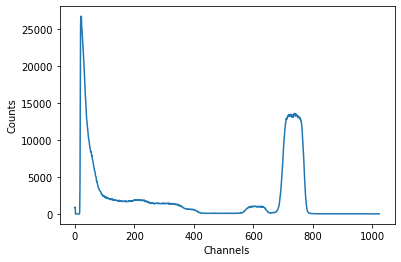

In [11]:
#load the x and y from the object:
xx, yy = idf_file.get_dataxy()

#create figure and plot it
plt.figure()
plt.plot(xx, yy)
plt.xlabel('Channels')
plt.ylabel('Counts')

## Adding beam parameters

We now add the beam parameters:

In [12]:
idf_file.set_beam_energy(2000)
idf_file.set_beam_energy_spread(20)
idf_file.set_beam_particles('4He')
idf_file.set_charge(5)
idf_file.set_geometry_type('IBM')
idf_file.set_incident_angle(30)
idf_file.set_scattering_angle(140)
idf_file.set_detector_solid_angle(11)
idf_file.set_energy_calibration(2.28, 105.5)

or, instead we can use `set_geo_parameters()` to add the all the parameters at once. For this, we first define a dictionary with the parameters:

In [13]:
geo_params = {'beam_energy': 2000.0,
          'beam_FWHM': 20.0,
          'projectile': '4He', 
          'charge': 5,
          'geometry': 'IBM',
          'angles': ['30', '140'],
          'dect_solid': '11',
          'energy_calib': [2.28, 105.5]
         }

idf_file.set_geo_parameters(geo_params)

## Adding the sample details

### Elements

We begin by defining the elements dictionary forming the sample and use `set_elements()` to add it to the IDF object (see also `help(idf_file.set_elements)`). In this example we have a sample with CoPt, SiO2 and Si.

In [14]:
#define the elements dictionary 
elements = {
    #number of elements
    'nelements':3,
    #element 1
    0: {'name': 'Co 1 Pt 1',
        'density': '',
        'concentration': ['0','1'],
        'depth': ['0','1000']},
    #element 2
    1: {'name': 'Si 1 O 2',
        'density': '',
        'concentration': ['0','1'],
        'depth': ['0','1000']},
    #element 3
    2: {'name': 'Si',
        'density': '',
        'concentration': ['0', '1'],
        'depth': ['300','1e6']},    
}

idf_file.set_elements(elements)

### Depth profile

Similar to the process above, to include the depth profile of the sample, we define first the profile dictionary and then load it into the IDF object using `idf_file.set_profile()`. Here, our sample has 3 layers - CoPt/SiO$_2$/Si. Therefore, the profile dictionary is:

In [15]:
#dictionary defining the depth profile of the sample
profile_dic = {
    'nlayers': '3',
    'names': ['Co 1 Pt 1', 'Si 1 O 2', 'Si'],
    0: {'thickness': 390,     'concentrations': [100, 0,  0]}, 
    1: {'thickness': 550,     'concentrations': [ 0, 100, 0]}, 
    2: {'thickness': 4000000, 'concentrations': [ 0,  0, 100]}                              
}

#add the profile to the IDF object
idf_file.set_profile(profile_dic)

### Add a note

It is also possible to add notes and turn IDF into a logbook.

In [16]:
#define note
note = 'This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.'

#add note to idf_file
idf_file.set_note(note)

#if you want to add more notes afterwards, it is possible to append them to the previous ones
note = 'Something I did after the first note'
idf_file.set_note(note, append=True)

#check the notes
print(idf_file.get_notes())


#it is also possible to define the author of the file
author = 'Miguel Sequeira'
idf_file.set_user(author)


['This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.', 'Something I did after the first note']


## Saving the IDF object

Until this point, nothing has been saved into the disk. To save the `idf_file` object into the file, using the IDF file format, we use `idf_file.save_idf()`.

In [17]:
#define the path to the new file
path_to_save = 'idf_example1.xml'

#create the idf file
idf_file.save_idf(path_to_save);

## Checking the file

If you want to check the contents of the IDF object (or file), you use `idf_file.printout_idf_file()`. However, it is much more efficient to use the GUI IDFViewer (see [Example A2](../advanced_examples/Example_a2/IDFViewer_pyIBA.ipynb)).

=============== idf_example1 ===============
idf_example1.xml
Miguel Sequeira 

------------------  Notes  ------------------
This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.
Something I did after the first note

------------------ Elements -----------------
nelements 	 3

 - - - Element 0 - - -
name 		 Co 1 Pt 1
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 1 - - -
name 		 Si 1 O 2
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 2 - - -
name 		 Si
density  	 
concentration  	 ['0', '1']
depth 		 ['300', '1e6']

------------------ Profile -----------------
nlayers 		 2
names 		 ['Co 1 Pt 1', 'Si 1 O 2', 'Si']

 - - - Layer 0 - - -
thickness 		 390
concentrations  	 ['100', '0', '0']

 - - - Layer 1 - - -
thickness 		 550
concentrations  	 ['0', '100', '0']

 - - - Layer 2 - - -
thickness 		 4000000
concentrations  	 ['0', '0', '100']



-------- Spectrum 0 (RBS2PT50CO50_30.odf)

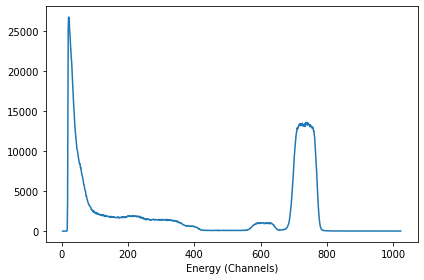

In [18]:
idf_file.print_idf_file()

If you want to directly check the XML file, you can set `mode = 'XML'`:

In [19]:
idf_file.print_idf_file(mode='XML')

<?xml version="1.0" ?>
<idf xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://idf.schemas.itn.pt" xmlns:idf="http:/idf.schemas.itn.pt" xmlns:ndf="http:/ndf.schemas.itn.pt" xsi:schemaLocation="http:/idf.schemas.itn.pt idfv1.xsd http://ndf.schemas.itn.pt ndfv1.xsd">
  <users>
    <user>Miguel Sequeira</user>
  </users>
  <notes>
    <note>This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.</note>
    <note>Something I did after the first note</note>
  </notes>
  <attributes>
    <idfversion/>
    <filename/>
    <createtime/>
  </attributes>
  <sample>
    <users>
      <user/>
    </users>
    <notes>
      <note/>
    </notes>
    <description/>
    <structure>
      <layeredstructure>
        <nlayers>3</nlayers>
        <layers>
          <layer>
            <layerthickness units="1e15at/cm2">390</layerthickness>
            <layerelements>
              <layerelement>
                <name>Co 1 Pt 1</name>
                

[a](thumb.png)